<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Descriptive statistics</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;">Describing the characteristics of a dataset. <br> For example <br> - mean <br> - median <br> - mode <br> - variance <br> - distribution shape <br> - etc. <br> No relation to population, no generalization. <br><br> Inferential statistics is using the features of the dataset to make claims about the population. </p>
</div>

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Accuracy, Precision, Resolution</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
    <p style="padding-left:20px;padding-right:20px;"><strong>Accuracy</strong> is the relationship between the measurement and the truth. <br> <strong>Precision</strong> is the certainty of the measurement. (How much variance do we get if we measure agtain?) <br> <strong>Resolution</strong> is the number of data points per unit measurement (time, space, ...). </p>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

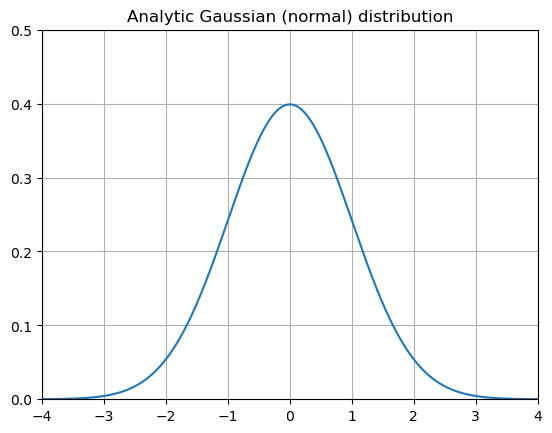

In [3]:
# Generating data using different distributions
# 1. Gaussian distribution

N = 1_001
x = np.linspace(-4, 4, N)
gaussianDistribution = stats.norm.pdf(x) # pdf: Probability density function

plt.plot(x, gaussianDistribution)
plt.title('Analytic Gaussian (normal) distribution')
plt.grid()
plt.ylim(0, 0.5)
plt.xlim(np.min(x), np.max(x))
plt.show()

In [4]:
sumOfDistribution = np.sum(gaussianDistribution)
print(f'sum of distribution is {sumOfDistribution}')

sum of distribution is 124.99221530601619


<div style="background:#ddffff;border-left: 6px solid #2196f3;">
    <p style="padding-left:20px;padding-right:20px;padding-bottom:20px;padding-top:20px;">This is not a probability distribution, as a probability distribution needs to have a sum of 1. Converting into one requires dividing by the sum.</p>
</div>

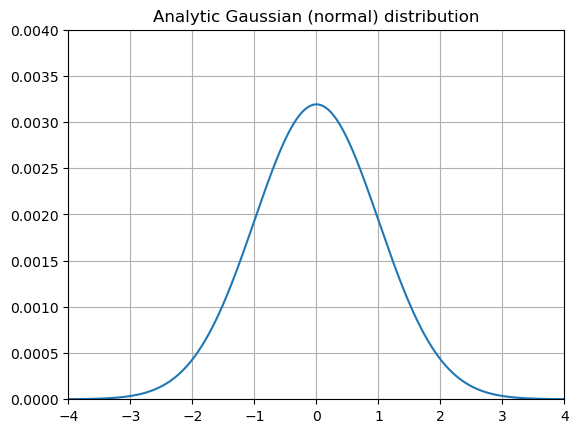

In [5]:
gaussianDistributionNormalized = gaussianDistribution / sumOfDistribution
plt.plot(x, gaussianDistributionNormalized)
plt.title('Analytic Gaussian (normal) distribution')
plt.grid()
plt.ylim(0, 0.004)
plt.xlim(np.min(x), np.max(x))
plt.show()

In [6]:
dx = x[1] - x[0]
area = np.sum(gaussianDistribution) * dx
area

0.9999377224481304

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
    <p style="padding-left:20px;padding-right:20px;padding-bottom:20px;padding-top:20px;">Total area is 1, which means this is a normal distribution.</p>
</div>

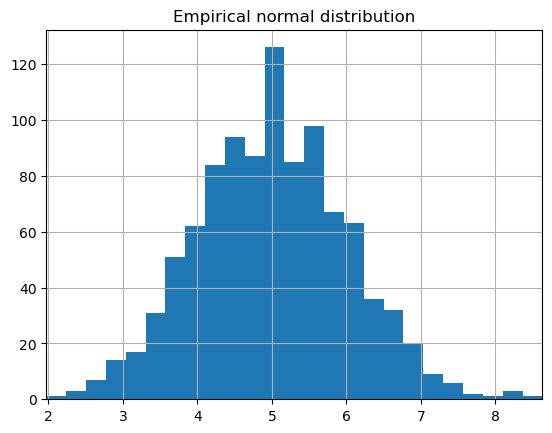

In [7]:
# Empirical normal distribution

stretch = 1 # variance (square of standard deviation)
shift   = 5 # mean
n       = 1_000

# create data
data = stretch * np.random.randn(n) + shift

plt.hist(data, 25)
plt.title('Empirical normal distribution')
plt.xlim(np.min(data), np.max(data))
plt.grid()
plt.show()

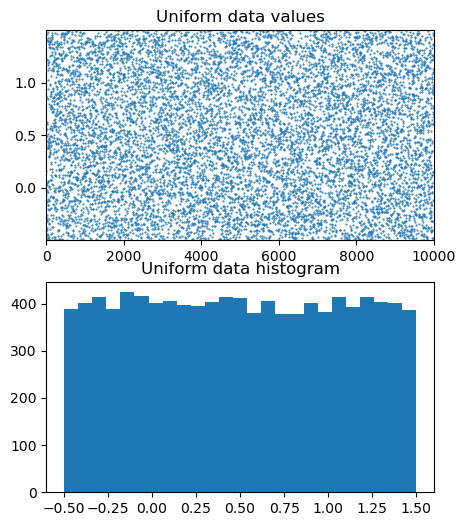

In [8]:
# 2. Uniformly distributed numbers

stretch = 2 # NOT the variance
shift   = 0.5 
n       = 10_000

data = stretch * np.random.rand(n) + shift - stretch/2

fig,ax = plt.subplots(2, 1, figsize=(5, 6))

ax[0].plot(data, '.', markersize=1)
ax[0].set_ylim(np.min(data), np.max(data))
ax[0].set_xlim(0, len(data))
ax[0].set_title('Uniform data values')

ax[1].hist(data, 25)
ax[1].set_title('Uniform data histogram')

plt.show()

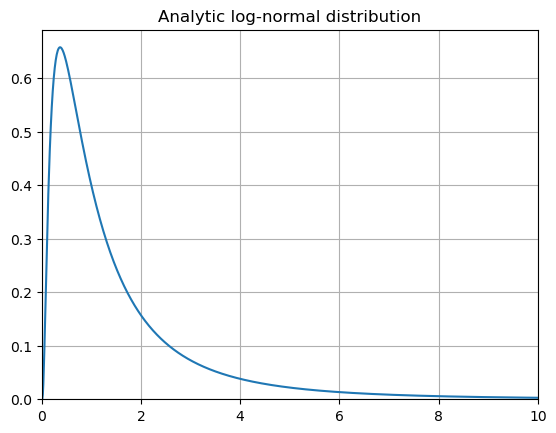

In [9]:
# 3. Log-normal distribution

N = 1_001
x = np.linspace(0, 10, N)
logNormalDistribution = stats.lognorm.pdf(x, 1)

plt.plot(x, logNormalDistribution)
plt.title('Analytic log-normal distribution')
plt.xlim(0, np.max(x))
plt.ylim(0, np.max(logNormalDistribution)*1.05)
plt.grid()
plt.show()

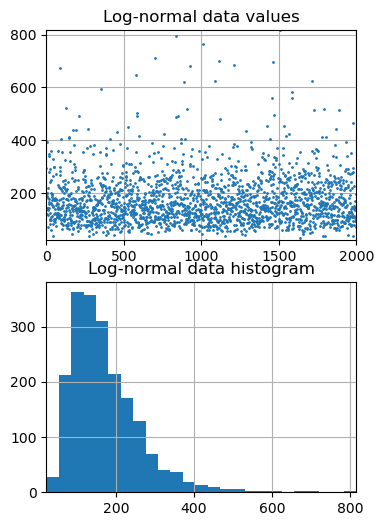

In [10]:
# Empirical log-normal distribution

shift   = 5 # ln(mean)
stretch = 0.5
n       = 2_000

data = stretch * np.random.randn(n) + shift
data = np.exp(data)

fig,ax = plt.subplots(2, 1, figsize=(4, 6))

ax[0].plot(data, '.', markersize=2)
ax[0].set_xlim(0, n)
ax[0].set_ylim(np.min(data), np.max(data))
ax[0].grid()
ax[0].set_title('Log-normal data values')

ax[1].hist(data, 25)
ax[1].grid()
ax[1].set_xlim(np.min(data), np.max(data))
ax[1].set_title('Log-normal data histogram')

plt.show()

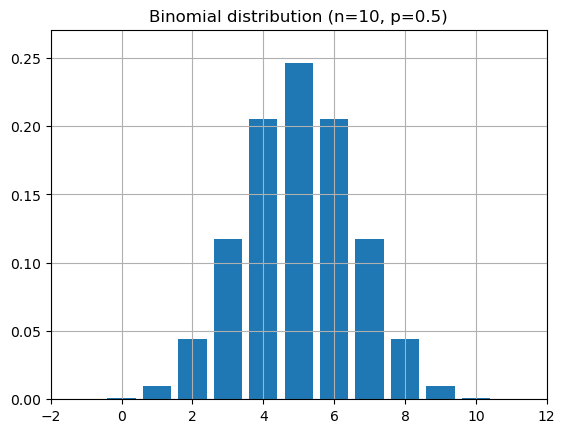

In [11]:
# 4. Binomial distribution
# Binomial distribution is the probability of K heads in N coin tosses, given a fair coin.

n = 10 # number of coin tosses
p = .5 # probability of heads

x = np.linspace(0, n+1, n+2) # 0, 1, 2, 3, ... (n + 1)
binomialDistribution = stats.binom.pmf(x, n, p)

plt.bar(x, binomialDistribution)
plt.xlim(np.min(x)-2, np.max(x)+1)
plt.ylim(0, np.max(binomialDistribution)*1.1)
plt.grid()
plt.title('Binomial distribution (n=%s, p=%g)'%(n, p))
plt.show()

[]

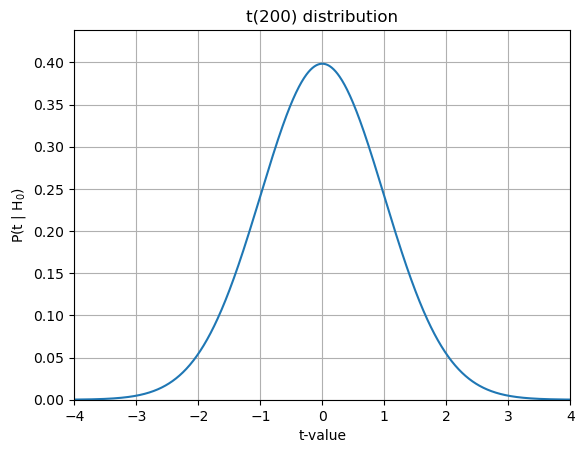

In [12]:
# 5. T distribution

x = np.linspace(-4, 4, 1_001)
df = 200
t = stats.t.pdf(x, df)

plt.plot(x, t)
plt.xlabel('t-value')
plt.ylabel('P(t | H$_0$)')
plt.title('t(%g) distribution'%df)
plt.xlim(np.min(x), np.max(x))
plt.ylim(0, np.max(t)*1.1)
plt.grid()
plt.plot()

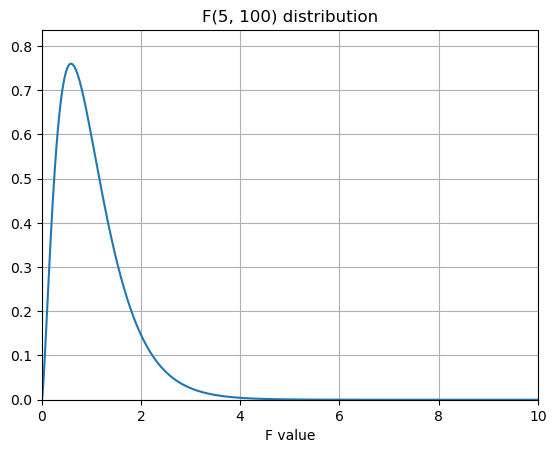

In [13]:
# 6. F distribution

num_df = 5
den_df = 100

x = np.linspace(0, 10, 10_001)
fDistribution = stats.f.pdf(x, num_df, den_df)

plt.plot(x, fDistribution)
plt.title(f'F({num_df}, {den_df}) distribution')
plt.xlabel('F value')
plt.xlim(0, np.max(x))
plt.ylim(0, np.max(fDistribution)*1.1)
plt.grid()
plt.show()

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
    <h1 style="text-align:center;">Central tendencies</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
    <p style="padding-left:20px;padding-right:20px;padding-bottom:20px;padding-top:20px;">A central tendency is a value we expect the values to merge towards.<br> In case of the Gaussian distribution, all three central tendencies (mean, median, mode) are the same.<br><br> <strong>Mean</strong> is the average of the data values. Sum of data values divided by the number of data values. Usually denoted by mu, or "x bar" which is written as a horizontal line above the letter. It is suitable for roughly Gaussian distributions.<br><strong>Median</strong> is the "middle" value. Half of the data is below, half is above the median. It is suitable for any distribution, but only appropriate for unimodal distributions.<br><strong>Mode</strong> is the most commonly present value. Suitable for any distribution and any data type. Usually used for nominal data.</p>
</div>

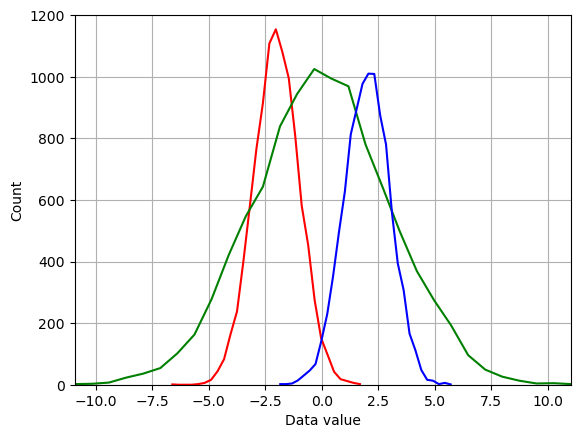

In [14]:
# Mean
# Create normal distributions

N    = 10_001
bins = 30

d1 = np.random.randn(N) - 2
d2 = np.random.randn(N) * 3
d3 = np.random.randn(N) + 2

y1,x1 = np.histogram(d1, bins)
x1 = (x1[1:] + x1[:-1]) / 2
y2,x2 = np.histogram(d2, bins)
x2 = (x2[1:] + x2[:-1]) / 2
y3,x3 = np.histogram(d3, bins)
x3 = (x3[1:] + x3[:-1]) / 2

plt.plot(x1 ,y1,'r')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'b')
plt.xlim(np.min(x2), np.max(x2))
plt.ylim(0, 1200)
plt.grid()
plt.xlabel('Data value')
plt.ylabel('Count')

plt.show()

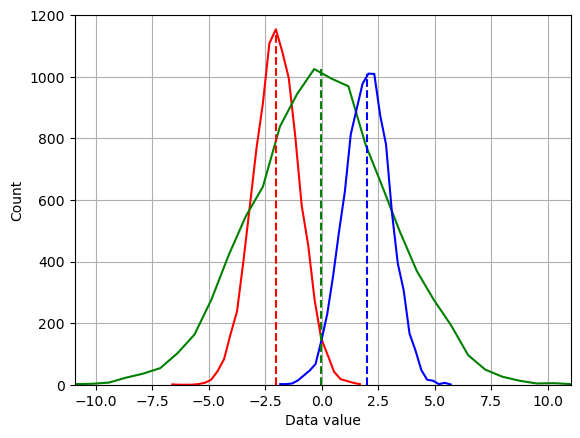

In [15]:
m1 = np.mean(d1)
m2 = np.mean(d2)
m3 = np.mean(d3)

plt.plot(x1 ,y1,'r')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'b')
plt.plot([m1, m1], [0, np.max(y1)], 'r--')
plt.plot([m2, m2], [0, np.max(y2)], 'g--')
plt.plot([m3, m3], [0, np.max(y3)], 'b--')
plt.xlim(np.min(x2), np.max(x2))
plt.ylim(0, 1200)
plt.grid()
plt.xlabel('Data value')
plt.ylabel('Count')

plt.show()

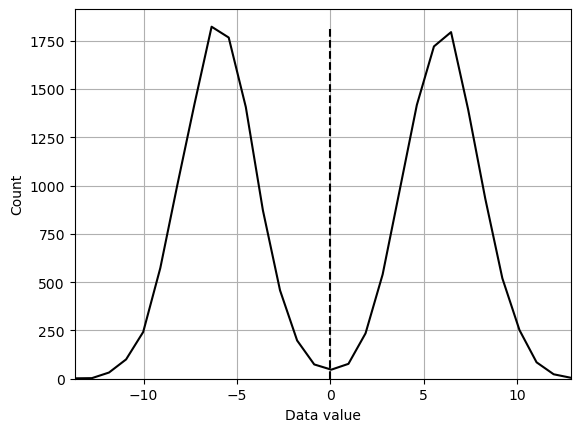

In [16]:
# "failure case" of mean, bimodal distribution

d4 = np.hstack([2*np.random.randn(N) - 6, 2*np.random.randn(N) + 6])
y4, x4 = np.histogram(d4, bins)
x4 = (x4[1:] + x4[:-1]) / 2
m4 = np.mean(d4)

plt.plot(x4 ,y4,'k')
plt.plot([m4, m4], [0, np.max(y4)], 'k--')
plt.xlim(np.min(x4), np.max(x4))
plt.ylim(0, np.max(y4)*1.05)
plt.grid()
plt.xlabel('Data value')
plt.ylabel('Count')

plt.show()

# In this example the mean is not close to where we expect most data to be, so mean is not representative

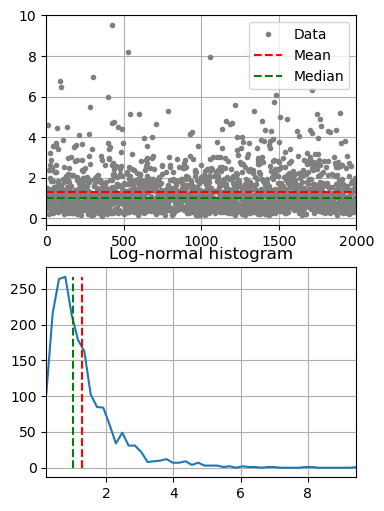

In [17]:
# Median
# Create a log-normal distribution

shift   = 0
stretch = .7
n       = 2_000
bins    = 50

data = stretch * np.random.randn(n) + shift
data = np.exp(data)

y,x = np.histogram(data,bins)
x = (x[1:] + x[:-1]) / 2

mean = np.mean(data)
median = np.median(data)

fig,ax = plt.subplots(2, 1, figsize=(4, 6))

ax[0].plot(data, '.', color=[.5, .5, .5], label='Data')
ax[0].plot([0, n], [mean, mean], 'r--', label='Mean')
ax[0].plot([0, n], [median, median], 'g--', label='Median')
ax[0].legend()
ax[0].set_xlim(0, n)
ax[0].grid()

ax[1].plot(x, y)
ax[1].plot([mean, mean], [0, np.max(y)], 'r--')
ax[1].plot([median, median], [0, np.max(y)], 'g--')
ax[1].set_title('Log-normal histogram')
ax[1].set_xlim(np.min(x), np.max(x))
ax[1].grid()

plt.show()

In [18]:
# Mode

data = np.round(np.random.randn(10))
uniqueData = np.unique(data)
for i in range(len(uniqueData)):
    print(f'{uniqueData[i]} appears {np.sum(data==uniqueData[i])} times.')
print('')
print(f'The modal value is %g'%stats.mode(data)[0])

-2.0 appears 1 times.
-1.0 appears 3 times.
0.0 appears 2 times.
1.0 appears 3 times.
2.0 appears 1 times.

The modal value is -1


<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Measures of dispersion</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
    <p style="padding-left:20px;padding-right:20px;"><strong>Variance</strong> is the square every points distance from the mean summed, and divided by the number of points minus one. <br><strong>Standard deviation</strong> is the square root of variance.<br>Variance is suitable for any distribution, but best for unimodal distributions. The suitable data types are numerical data.<br>(If we calculate population variance and not sample variance, we divide by n instead of n-1.)</p>
</div>

In [37]:
def variance(data):
    mean = np.mean(data)
    n = len(data)
    data = (data - mean)**2
    return np.sum(data) / (n - 1)

def std(data):
    return np.sqrt(variance(data))

sample = np.random.randn(1000) * 2
print(std(sample))

2.0159070793415843


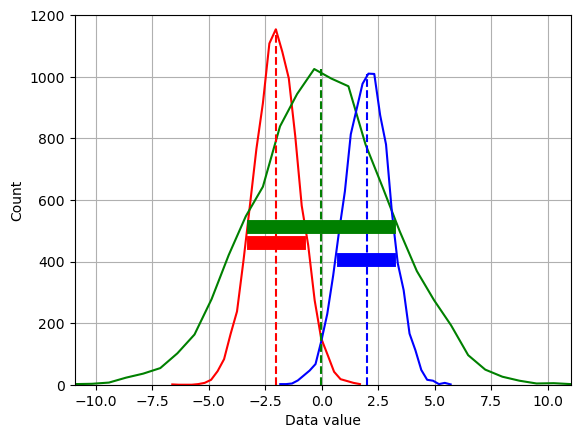

In [32]:
stds = np.zeros(3)

stds[0] = np.std(d1, ddof=1)
stds[1] = np.std(d2, ddof=1)
stds[2] = np.std(d3, ddof=1)
plt.plot(x1 ,y1,'r')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'b')
plt.plot([m1, m1], [0, np.max(y1)], 'r--')
plt.plot([m2, m2], [0, np.max(y2)], 'g--')
plt.plot([m3, m3], [0, np.max(y3)], 'b--')

plt.plot([m1 - stds[0], m1 + stds[0]], [.4*np.max(y1), .4*np.max(y1)], 'r', linewidth=10)
plt.plot([m2 - stds[1], m2 + stds[1]], [.5*np.max(y2), .5*np.max(y2)], 'g', linewidth=10)
plt.plot([m3 - stds[2], m3 + stds[2]], [.4*np.max(y3), .4*np.max(y3)], 'b', linewidth=10)

plt.xlim(np.min(x2), np.max(x2))
plt.ylim(0, 1200)
plt.grid()
plt.xlabel('Data value')
plt.ylabel('Count')
plt.show()